# Project 4: Graph Algorithms - Part 1

In [ ]:
if (!require("igraph")) install.packages("igraph")
library ("igraph")
if (!require("clevr")) install.packages("clevr")
library ("clevr")

Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: clevr

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘clevr’”
also installing the dependencies ‘Rcpp’, ‘BH’





The downloaded binary packages are in
	/var/folders/m6/4mgxnhd5575fll1p8n3_wcjc0000gn/T//RtmpEHkWWY/downloaded_packages


In [ ]:
# Reading the csv files
path = "finance_data/data/"
out.file<-""
file.names <- dir(path, pattern =".csv")
m <- matrix(, nrow = 0, ncol = 765)
sectors.table <- read.table("finance_data/Name_sector.csv",header=TRUE, sep=",", stringsAsFactors=TRUE)
sectors = c()
sectors.names <- c()
for(i in 1:length(file.names)){
    file <- read.table(paste("finance_data/data/",file.names[i],sep = ""),header=TRUE, sep=",", stringsAsFactors=FALSE)
    if(length(file$Close)==765){
        m <- rbind(m, matrix(file$Close, nrow=1, ncol=765))
        mystr <- substr(file.names[i], 1, nchar(file.names[i])-4)
        sector <- sectors.table$Sector[which(sectors.table$Symbol == mystr)]
        sectors.names = c(sectors.names, toString(sector))
    }
}

In [ ]:
# Printing the sector details
com_num = length(sectors.names)
data_num = ncol(m)
sector.set<-as.factor(sectors.names)
sectors.index<-as.numeric(sector.set)
num_sector <- length(unique(sectors.index))
table(sector.set)

sector.set
    Consumer Discretionary           Consumer Staples 
                        84                         36 
                    Energy                 Financials 
                        34                         63 
               Health Care                Industrials 
                        60                         64 
    Information Technology                  Materials 
                        66                         24 
               Real Estate Telecommunication Services 
                        31                          4 
                 Utilities 
                        28 

QUESTION 1: What are upper and lower bounds on $ρ_{ij}$? Provide a justification for using log- normalized return ($r_i(t)$) instead of regular return ($q_i(t)$).

$\rho_{ij}=\frac{\langle r_i(t) r_j(t) \rangle - \langle r_i(t) \rangle \langle r_j(t) \rangle}{\sqrt{(\langle r_i(t)^2 \rangle - \langle r_i(t) \rangle^2)(\langle r_j(t)^2 \rangle - \langle r_j(t) \rangle^2)}}$  
Let $\langle x(t) \rangle = \frac{1}{t_{max}}\sum\limits_{t=1}^{t_{max}} x(t)$.  
Then  
$\rho_{ij}=\frac{\frac{1}{t_{max}}\sum\limits_{t=1}^{t_{max}} r_i(t)r_j(t)- \frac{1}{t_{max}}\sum\limits_{t=1}^{t_{max}} r_i(t) \frac{1}{t_{max}}\sum\limits_{t=1}^{t_{max}} r_j(t)}{\sqrt{\big( \frac{1}{t_{max}}\sum\limits_{t=1}^{t_{max}} r_i(t)^2-\frac{1}{t_{max}}\sum\limits_{t=1}^{t_{max}} r_i(t)\frac{1}{t_{max}}\sum\limits_{t=1}^{t_{max}} r_i(t)\big)\big(\frac{1}{t_{max}}\sum\limits_{t=1}^{t_{max}} r_j(t)^2-\frac{1}{t_{max}}\sum\limits_{t=1}^{t_{max}} r_j(t)\frac{1}{t_{max}}\sum\limits_{t=1}^{t_{max}} r_j(t)\big)}}$  
  
Simplify the notation:  
  
$\rho_{ij}=\frac{\frac{1}{t}\sum r_ir_j- \frac{1}{t}\sum r_i \frac{1}{t}\sum r_j}{\sqrt{\big( \frac{1}{t}\sum r_i^2-\frac{1}{t}\sum r_i\frac{1}{t}\sum r_i\big)\big(\frac{1}{t}\sum r_j^2-\frac{1}{t}\sum r_j\frac{1}{t}\sum r_j\big)}}$
$=\frac{\frac{1}{t}\sum r_ir_j- \big(\frac{1}{t}\big)^2\sum r_i \sum r_j}{\sqrt{\big( \frac{1}{t}\sum r_i^2-\big(\frac{1}{t}\big)^2\sum r_i\sum r_i\big)\big(\frac{1}{t}\sum r_j^2-\big(\frac{1}{t}\big)^2\sum r_j\sum r_j\big)}}$  
  
Case 1, $r_i = r_j$:  
$\rho_{ij}=\frac{\frac{1}{t}\sum r^2- \big(\frac{1}{t}\big)^2\sum r \sum r}{\sqrt{\big( \frac{1}{t}\sum r^2-\big(\frac{1}{t}\big)^2\sum r\sum r\big)\big(\frac{1}{t}\sum r^2-\big(\frac{1}{t}\big)^2\sum r\sum r\big)}}$ 
$=\frac{\frac{1}{t}\sum r^2- \big(\frac{1}{t}\big)^2\sum r \sum r}{\frac{1}{t}\sum r^2- \big(\frac{1}{t}\big)^2\sum r \sum r}=1$  
  
Case 2, $r_i = -r_j$:  
$\rho_{ij}=\frac{\frac{1}{t}\big(-\sum r^2\big)- \big(\frac{1}{t}\big)^2\big(-\sum r \sum r\big)}{\sqrt{\big( \frac{1}{t}\sum r^2-\big(\frac{1}{t}\big)^2\sum r\sum r\big)\big(\frac{1}{t}\sum r^2-\big(\frac{1}{t}\big)^2\sum r\sum r\big)}}$
$=\frac{-\big(\frac{1}{t}\sum r^2- \big(\frac{1}{t}\big)^2\sum r \sum r\big)}{\frac{1}{t}\sum r^2- \big(\frac{1}{t}\big)^2\sum r \sum r}=-1$  
  
Thus, the lower bound is -1 and the upper bound is 1.  

One reason why $r_i(t)$ may be used instead of $q_i(t)$ could be that if $p_i(t)$ were to remain constant throughout the time interval, then $q_i(t) = \langle q_i(t)^2\rangle=\langle q_i(t)\rangle^2=0$. This would cause one of the factors in the denominator of $\rho_{ij}$ to be 0 which would make $\rho_{ij}$ undefined.  
Another reason why $r_i(t)$ may be used is that if $q_i(t)$ is trending in an exponential manner, then using the log form makes it linear. This is a simplified representation which is often preferable. This transformation also makes it so that outliers are not as far away from the other data points which is often advantageous for applications like machine learning.

QUESTION 2: Plot a histogram showing the un-normalized distribution of edge weights.

In [ ]:
cal_cor<-function(comp_date){
log_val <- matrix(nrow=nrow(comp_date), ncol= ncol(comp_date)-1)
for(j in 1:nrow(comp_date)){
        log_val[j,] = diff(log(comp_date[j, ]))}
log_avg <- rowMeans(log_val)
temp <- cor(t(log_val))
return(temp)
    }

In [ ]:
temp <- cal_cor(m)
d <- sqrt(2 * (1 - temp))
g<-graph_from_adjacency_matrix(d, mode ="upper", weighted = TRUE, diag = TRUE,
  add.colnames = NULL, add.rownames = NA)
fname <- matrix(d)
save(fname, file = "distance.RData")

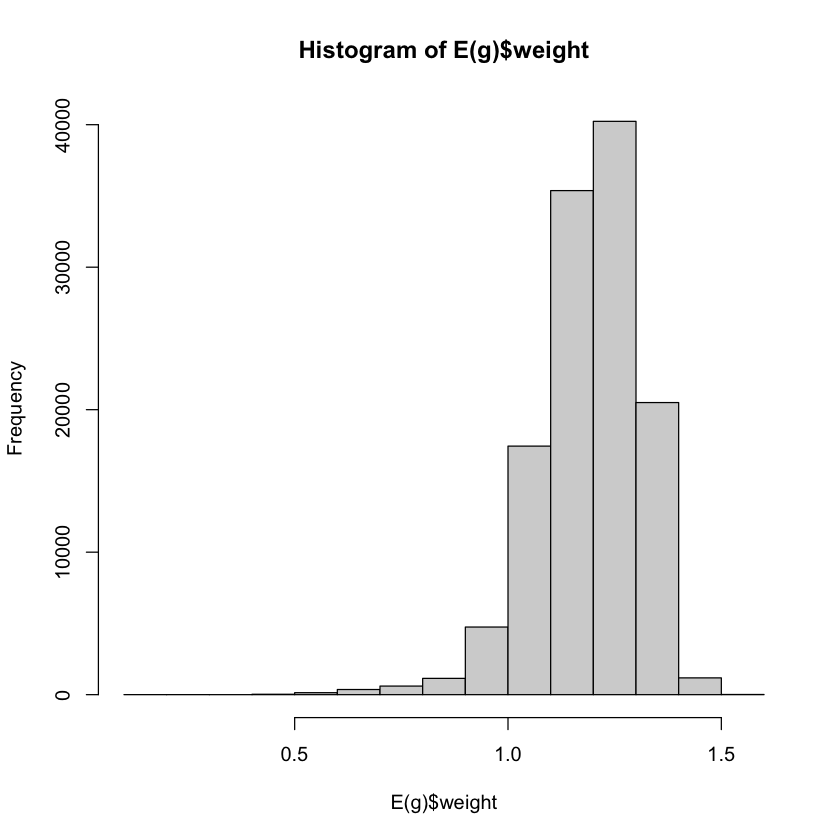

In [ ]:
# Plotting the un-normalized distribution of edge weights
hist(E(g)$weight)

QUESTION 3: Extract the MST of the correlation graph. Each stock can be categorized into a sector, which can be found in Name sector.csv file. Plot the MST and color-code the nodes based on sectors. Do you see any pattern in the MST? The structures that you find in MST are called Vine clusters. Provide a detailed explanation about the pattern you observe.

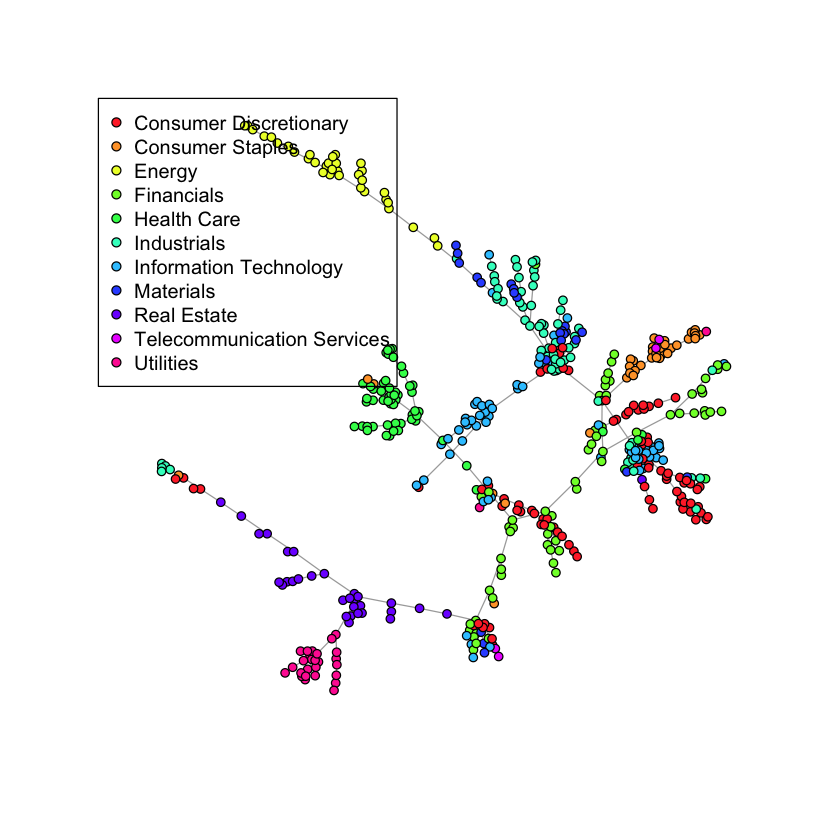

In [ ]:
# Extracting and plotting the minimum spanning tree of the correlation graph
mst_g <- mst(g, algorithm = 'prim')
colbar <- rainbow(num_sector,s = 0.8, v = 1)
plot(mst_g, vertex.size=3, vertex.label=NA, vertex.color=colbar[sectors.index])
legend('topleft',legend=levels(sector.set),pch=21, pt.bg=colbar)

A pattern that can be seen is that the nodes with the same sector coloring tend to be grouped together in the vine clusters of the tree.

QUESTION 4: Run a community detection algorithm (for example walktrap) on the MST ob- tained above. Plot the communities formed. Compute the homogeneity and completeness of the clustering. (you can use the ’clevr’ library in r to compute homogeneity and completeness).

[1] 33

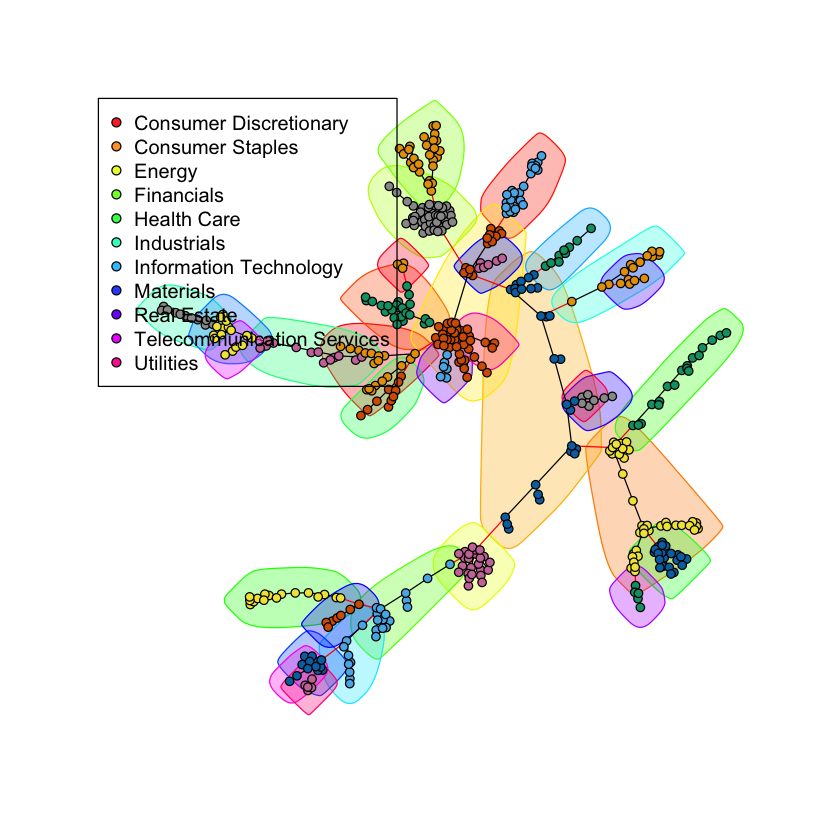

In [ ]:
# Clustering of correlation graph
wc_daily <- walktrap.community(mst_g, weights= E(mst_g)$weights, modularity = TRUE) 
length(wc_daily)
plot(wc_daily, mst_g, vertex.size=3, vertex.label=NA, vertex.color=sectors.index)
legend('topleft',legend=levels(sector.set),pch=21, pt.bg=colbar)

In [ ]:
# Computing the homogeneity and completeness of the clustering
true<- c(sectors.index)
pred <- c(wc_daily$membership)
homogeneity(true, pred)
completeness(true,pred)

[1] 0.6826446

[1] 0.4792845

QUESTION 5: Report the value of α for the two cases and provide an interpretation for
the difference.

In [ ]:
# Storing the sector list
Si <- c()
for(i in c(1:num_sector)){
  print(length(which(sectors.index==i)))
  Si[i] <- length(which(sectors.index==i))
}

[1] 84
[1] 36
[1] 34
[1] 63
[1] 60
[1] 64
[1] 66
[1] 24
[1] 31
[1] 4
[1] 28


In [ ]:
# Daily computation
p_method_1 = c()
p_method_2 = c()
for(v in c(1:vcount(mst_g))){
    neighbors_v = neighbors(mst_g,v)
    N_i = length(neighbors_v)
    Q_i=0
    for(i in neighbors_v){
        if(sectors.index[i]==sectors.index[v])
            Q_i=Q_i+1
    }
    current_sector = sectors.index[v]


    p_method_1[v] = Q_i/N_i    
    p_method_2[v] = Si[current_sector]/vcount(mst_g)
}
alpha_1 = sum(p_method_1)/vcount(mst_g)
print(sprintf("Alpha value (Daily) for method 1 is: %s",alpha_1))
alpha_2 = sum(p_method_2)/vcount(mst_g)
print(sprintf("Alpha value (Daily) for method 2 is: %s",alpha_2))

[1] "Alpha value (Daily) for method 1 is: 0.828930077530676"
[1] "Alpha value (Daily) for method 2 is: 0.114188070612532"


The difference is caused by the first definition of the P value being related to the number of neighbors belonging to the same sector of a given node over all neighbors of that node versus the second definition of the P value being related to all nodes belonging to a given sector over all nodes. The first definition of P causes a higher value of alpha because the number of neighbors of a sector is much closer to the total number of neighbors than all sector nodes to all nodes. For example, the highest number of nodes belong to a given sector is 84 and the total number of nodes is approximately 500.  
  
The first definition of P provides a more localized approach while the second definition is more globalized. 

QUESTION 6: Repeat questions 2,3,4,5 on the WEEKLY data.

In [ ]:
file <- read.table(paste("finance_data/data/",file.names[1],sep = ""),header=TRUE, sep=",", stringsAsFactors=FALSE)
Date_data<- file$Date
weekdays_data <-weekdays(as.Date(Date_data))

weekly_m_m <- m[,which("Monday" == weekdays_data)]
week_m_cor <- cal_cor(weekly_m_m)
week_m_d <- sqrt(2 * (1 - week_m_cor))


week_m_g<-graph_from_adjacency_matrix(week_m_d, mode ="upper", weighted = TRUE, diag = TRUE,
  add.colnames = NULL, add.rownames = NA)



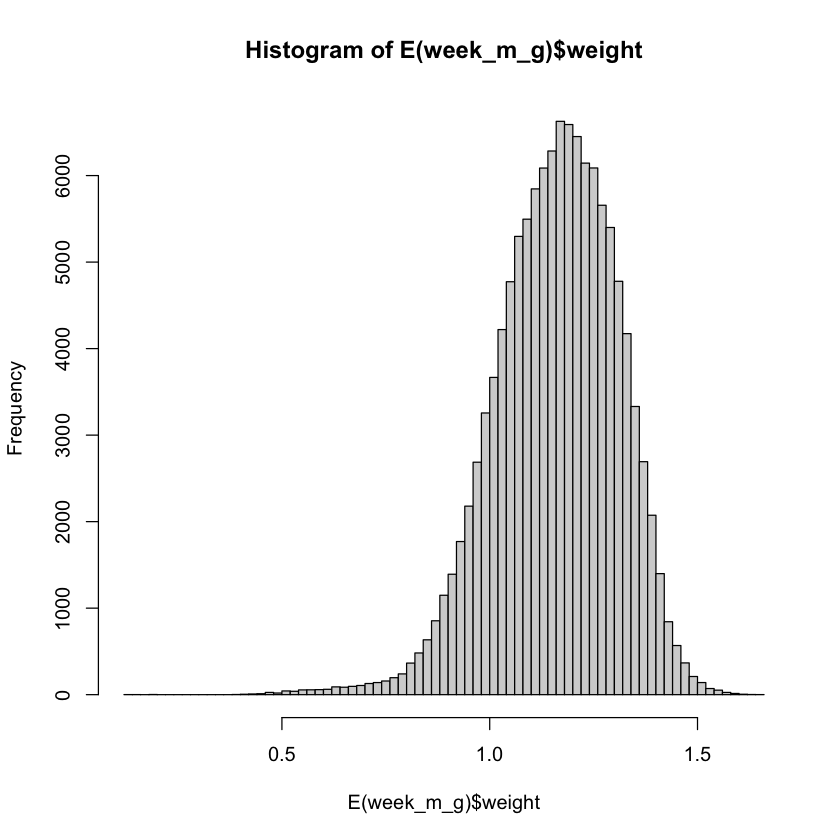

In [ ]:
# Plotting the un-normalized distribution of edge weights
hist(E(week_m_g)$weight,breaks = 100)

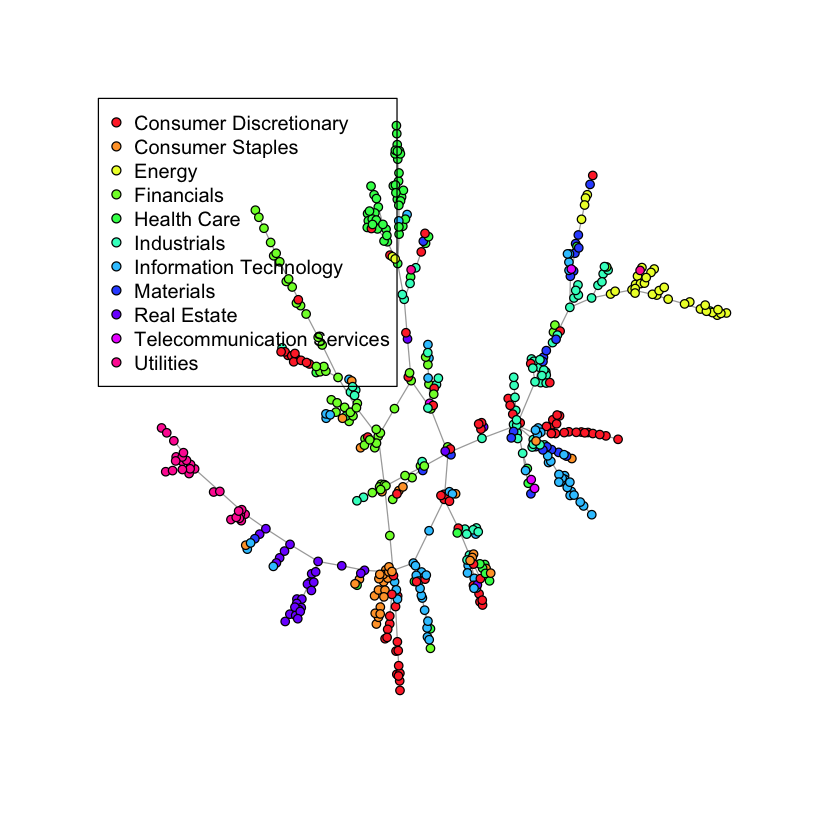

In [ ]:
# Extracting and plotting the minimum spanning tree of the correlation graph
mst_gw <- mst(week_m_g)
colbar <- rainbow(num_sector,s = 0.8, v = 1)
plot(mst_gw, vertex.size=3, vertex.label=NA, vertex.color=colbar[sectors.index])
legend('topleft',legend=levels(sector.set),pch=21, pt.bg=colbar)

[1] 42

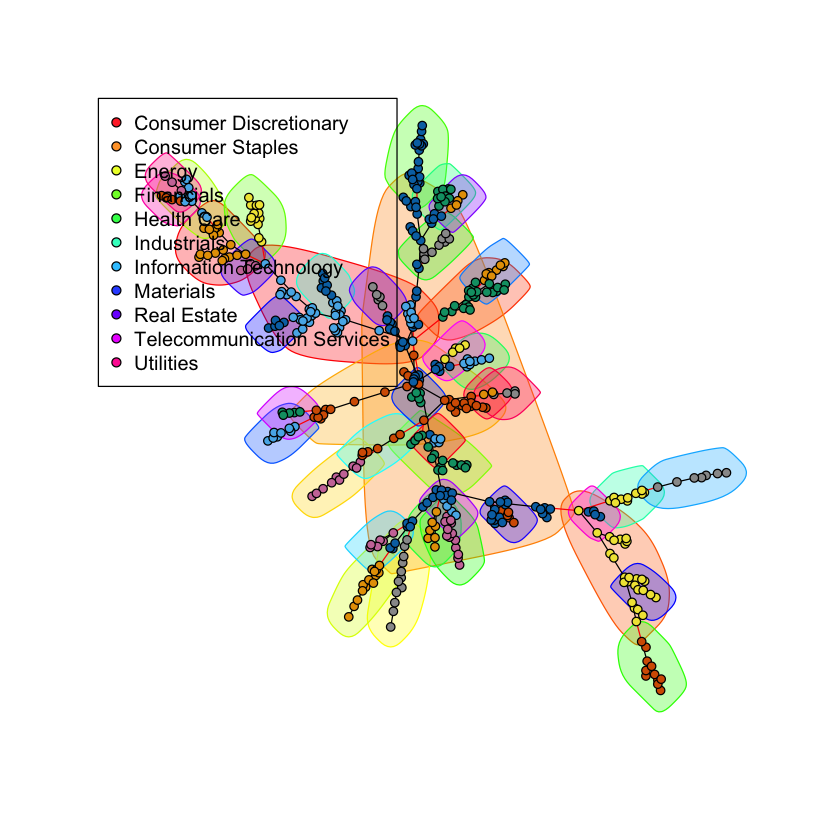

In [ ]:
# Clustering of correlation graph
wc_weekly <- walktrap.community(mst_gw, weights= E(mst_gw)$weights, modularity = TRUE) 
length(wc_weekly)
plot(wc_weekly, mst_gw, vertex.size=3, vertex.label=NA, vertex.color=sectors.index)
legend('topleft',legend=levels(sector.set),pch=21, pt.bg=colbar)

In [ ]:
# Computing the homogeneity and completeness of the clustering
true<- c(sectors.index)
pred <- c(wc_weekly$membership)
homogeneity(true, pred)
completeness(true,pred)

[1] 0.582007

[1] 0.3907714

For the weekly data, the sectors are more dispersed in each cluster, i.e. they are more mixed together. This causes the homogeneity and completeness scores to go down for the community detection.

In [ ]:
# Weekly computation
p_method_1 = c()
p_method_2 = c()
for(v in c(1:vcount(mst_gw))){
    neighbors_v = neighbors(mst_gw,v)
    N_i = length(neighbors_v)
    Q_i=0
    for(i in neighbors_v){
        if(sectors.index[i]==sectors.index[v])
            Q_i=Q_i+1
    }
    current_sector = sectors.index[v]


    p_method_1[v] = Q_i/N_i    
    p_method_2[v] = Si[current_sector]/vcount(mst_gw)
}
alpha_1 = sum(p_method_1)/vcount(mst_gw)
print(sprintf("Alpha value (Weekly) for method 1 is: %s",alpha_1))
alpha_2 = sum(p_method_2)/vcount(mst_gw)
print(sprintf("Alpha value (Weekly) for method 2 is: %s",alpha_2))

[1] "Alpha value (Weekly) for method 1 is: 0.742969603495919"
[1] "Alpha value (Weekly) for method 2 is: 0.114188070612532"


Since the second definition of P is globalized, it does not change compared to Daily. Since the first definition is localized, alpha1 decreases. This is because the sectors are more dispersed in the clusters which makes more noise in the data which causes less predictability.

QUESTION 7: Repeat questions 2,3,4,5 on the MONTHLY data.

In [ ]:
dates_num <- format(as.Date(Date_data,format="%Y-%m-%d"), format = "%d")
monthly_15_m <- m[,which("15" == dates_num)]
monthly_15_cor <- cal_cor(monthly_15_m )
monthly_15_d <- sqrt(2 * (1 - monthly_15_cor))
month_15_g<-graph_from_adjacency_matrix(monthly_15_d, mode ="upper", weighted = TRUE, diag = TRUE,
  add.colnames = NULL, add.rownames = NA)

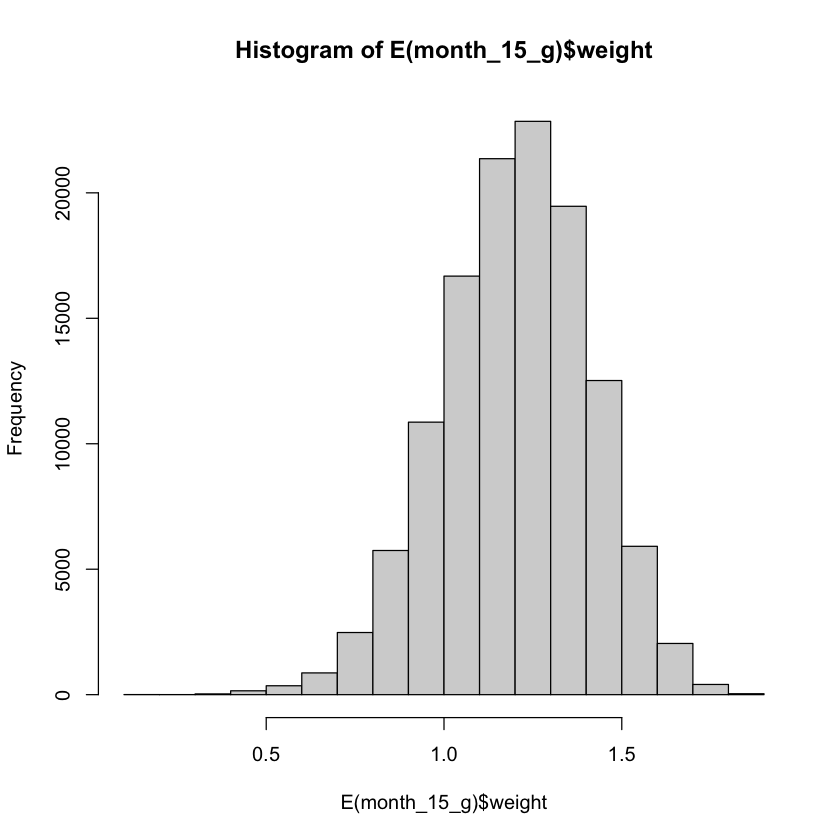

In [ ]:
# Plotting the un-normalized distribution of edge weights
hist(E(month_15_g)$weight)

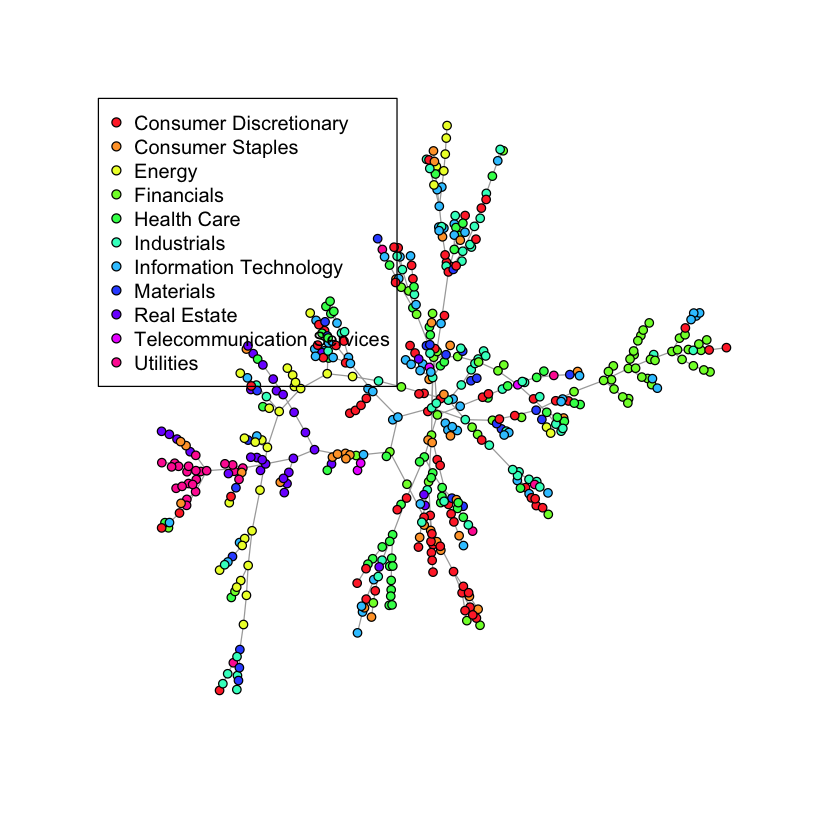

In [ ]:
# Extracting and plotting the minimum spanning tree of the correlation graph
mst_gm <- mst(month_15_g)
colbar <- rainbow(num_sector,s = 0.8, v = 1)
plot(mst_gm, vertex.size=3, vertex.label=NA, vertex.color=colbar[sectors.index])
legend('topleft',legend=levels(sector.set),pch=21, pt.bg=colbar)

[1] 74

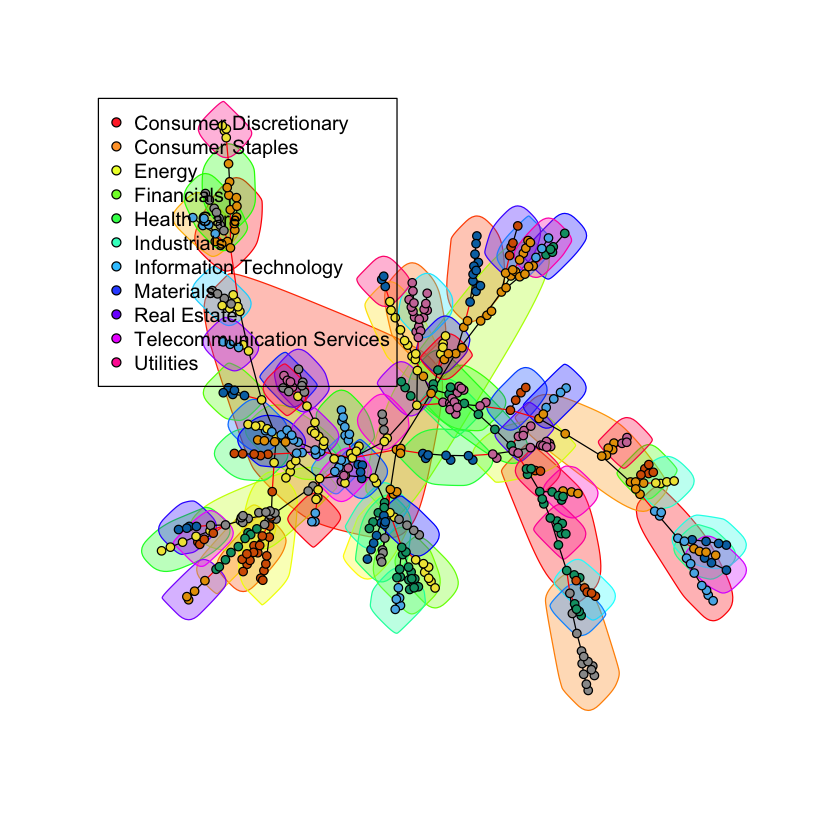

In [ ]:
# Clustering of correlation graph
wc_monthly <- walktrap.community(mst_gm, weights= E(mst_gm)$weights, modularity = TRUE) 
length(wc_monthly)
plot(wc_monthly, mst_gm, vertex.size=3, vertex.label=NA, vertex.color=sectors.index)
legend('topleft',legend=levels(sector.set),pch=21, pt.bg=colbar)

In [ ]:
# Computing the homogeneity and completeness of the clustering
true<- c(sectors.index)
pred <- c(wc_monthly$membership)
homogeneity(true, pred)
completeness(true,pred)

[1] 0.5095092

[1] 0.2823379

For Monthly, the sectors are even more dispersed in the clusters which in turn causes the homogeneity and completeness scores to drop even further than for Weekly.

In [ ]:
# Monthly computation
p_method_1 = c()
p_method_2 = c()
for(v in c(1:vcount(mst_gm))){
    neighbors_v = neighbors(mst_gm,v)
    N_i = length(neighbors_v)
    Q_i=0
    for(i in neighbors_v){
        if(sectors.index[i]==sectors.index[v])
            Q_i=Q_i+1
    }
    current_sector = sectors.index[v]


    p_method_1[v] = Q_i/N_i    
    p_method_2[v] = Si[current_sector]/vcount(mst_gm)
}
alpha_1 = sum(p_method_1)/vcount(mst_gm)
print(sprintf("Alpha value (Monthly) for method 1 is: %s",alpha_1))
alpha_2 = sum(p_method_2)/vcount(mst_gm)
print(sprintf("Alpha value (Monthly) for method 2 is: %s",alpha_2))

[1] "Alpha value (Monthly) for method 1 is: 0.483468286099865"
[1] "Alpha value (Monthly) for method 2 is: 0.114188070612532"


Again, since the second definition takes a more global view of the network, how the actual nodes are connected to each other does not cause alpha 2 to change. Since the sectors are mixed even more here, the first definition reduces even further than for Weekly.

QUESTION 8: Compare and analyze all the results of daily data vs weekly data vs monthly data. What trends do you find? What changes? What remains similar? Give reason for your observations. Which granularity gives the best results when predicting the sector of an unknown stock and why?

Interval|Homogeneity|Completeness|P1 Definition $\alpha$|P2 Definition $\alpha$  
---|---|---|---|---
Daily|0.682644648161366|0.479284479244588|0.8289301|0.1141881
Weekly|0.58200695320238|0.390771399621547|0.7429696|0.1141881
Monthly|0.509509234436883|0.282337925983778|0.4834683|0.1141881

As the time interval increases, the homogeneity and completeness decrease. This indicates that the smallest granularity, Daily, gives the best results when predicting the sector of an unkown stock. This is because the minimum spanning tree is better at grouping together the sectors when the time interval is small as can be seen in the MST graphs. That is, as the time span increases from daily to monthly, the sectors are more dispersed in the vine clusters. The P1 definition for $\alpha$ also decreases as the interval decreases. This makes sense due to P1 being defined as the fraction of neighbors being in the same sector over the total neighbors for a given node. If the sectors are grouped together, this fraction will be high for more nodes which contributes to a higher $\alpha$ overall. The p2 definition remains constant for all of the time intervals. This is due to the fact that P2 is defined as the fraction of all nodes belonging to a sector over all nodes. The sum adds a term for a given sector for each node that belongs to that sector. Since the number of nodes remains constant and their sector membership remains constant, this fraction and $\alpha$ will also remain constant. In sum, the P1 defintion is more local to a node while the P2 definition is more global, looking at the entire network.

At a high level, when predicting the sector of an unknown stock, we can infer that fluctuations from day to day are more stable than fluctuations across weeks or even months. Using consistent daily data gives us a more definitive way to predict than using erratic monthly data. 